# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [6]:
# pip install cufflinks

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
df.shape

(900, 8)

In [9]:
df2 = df.copy()
df2

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


## Exploratory Data Analysis and Visualization

In [10]:
df['Class'].replace({'Kecimen': 1, 'Besni': 0}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [16]:
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
38,77468,405.937,245.990,0.795,79220,0.722,1100.676,1
772,66265,424.559,203.381,0.878,70487,0.628,1126.765,0
288,74426,411.697,231.750,0.827,76449,0.679,1071.612,1
189,78982,421.162,241.640,0.819,81442,0.753,1102.423,1
806,142239,614.834,297.735,0.875,148078,0.644,1553.114,0


In [17]:
df.shape

(900, 8)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753
Class,900.000,0.500,0.500,0.000,0.000,0.500,1.000,1.000


In [19]:
df.Class.value_counts()

1    450
0    450
Name: Class, dtype: int64

In [21]:
df.Class.value_counts(normalize = True)

1   0.500
0   0.500
Name: Class, dtype: float64

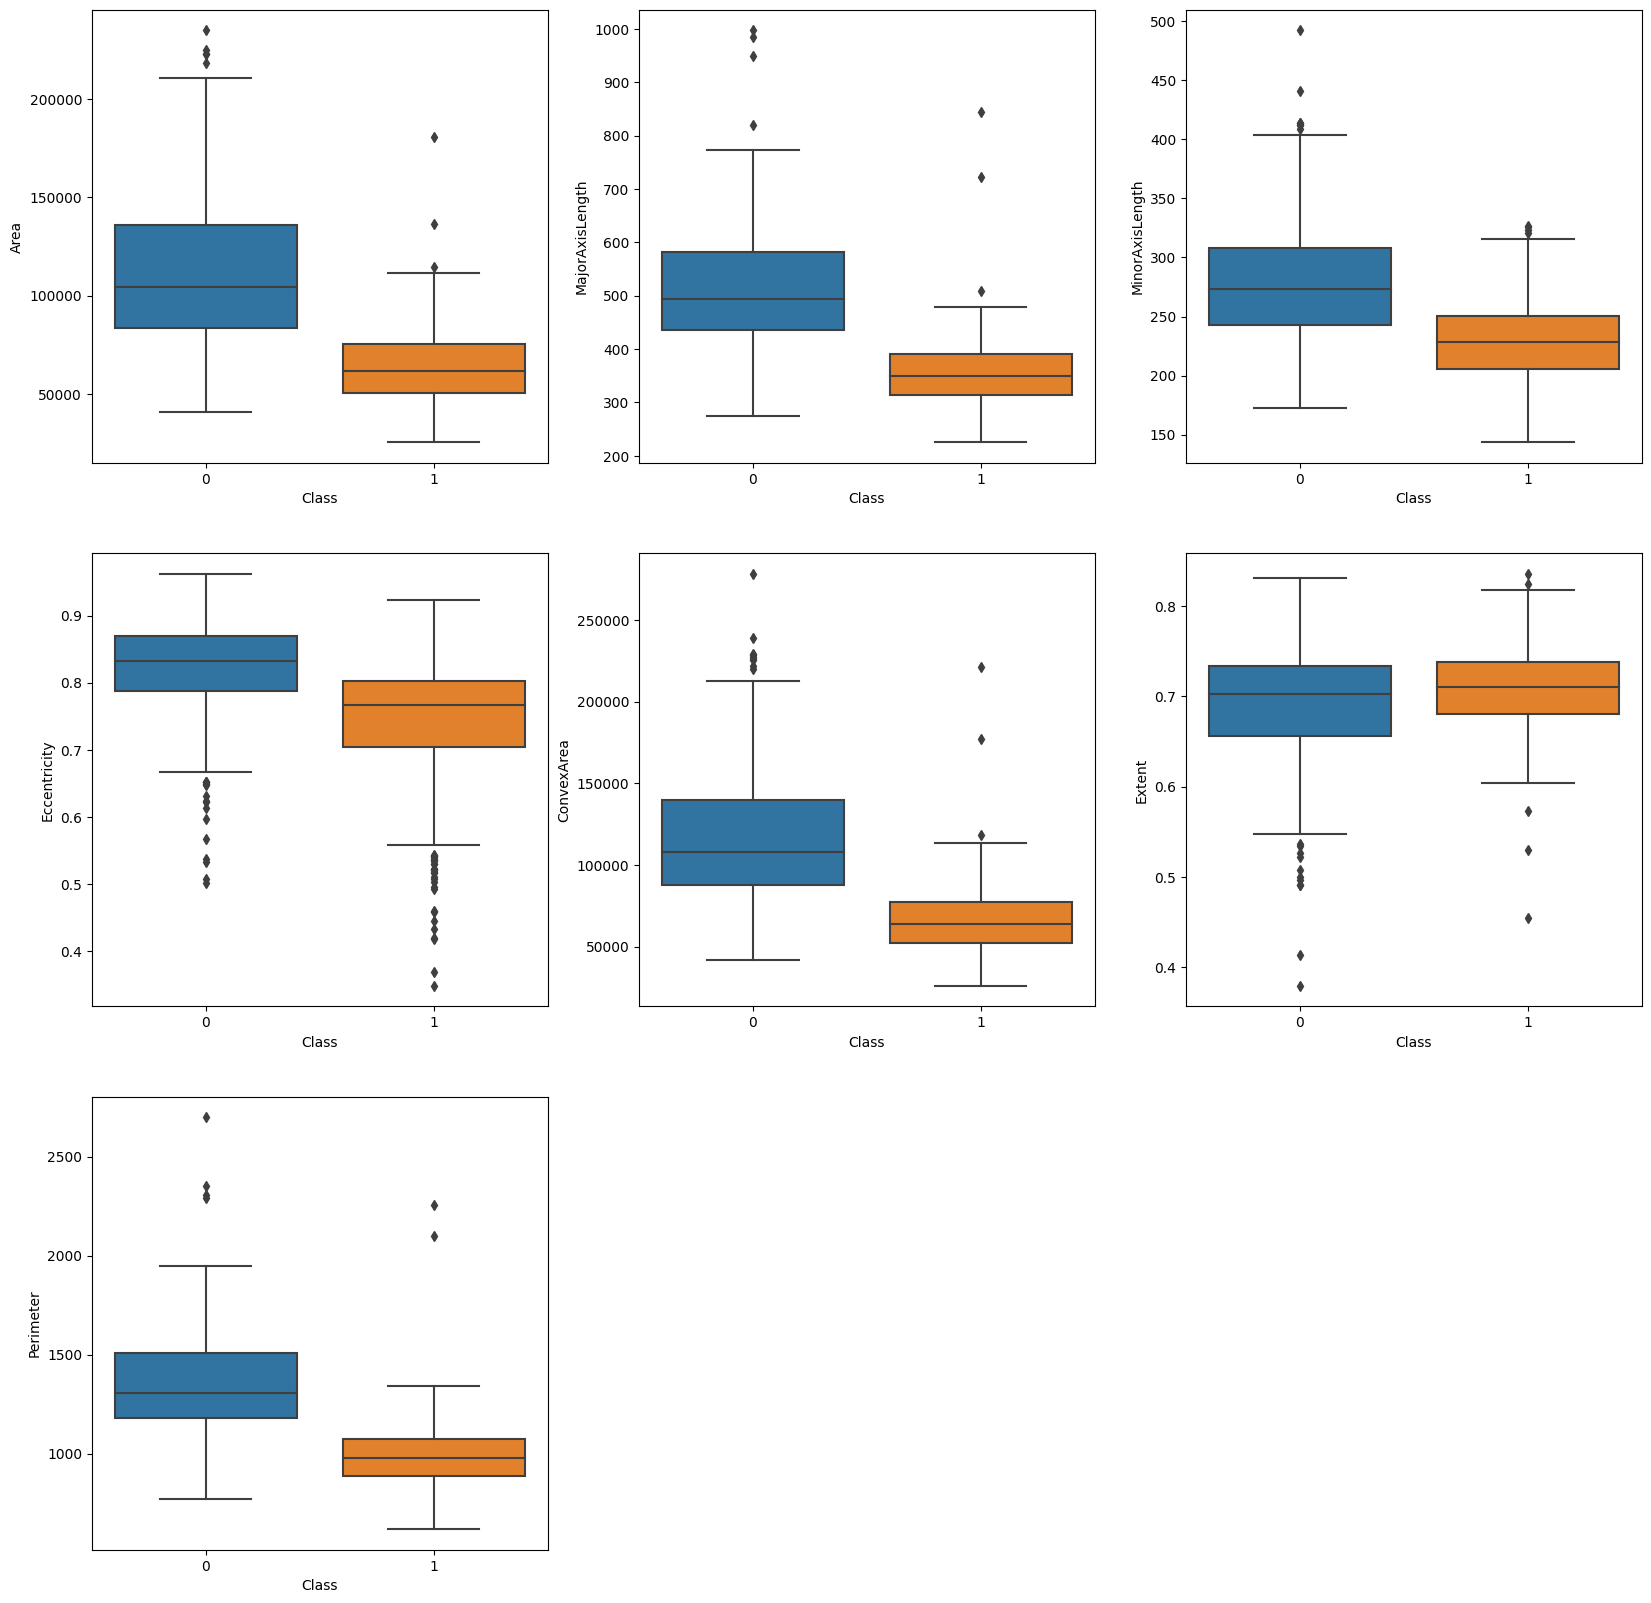

In [20]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

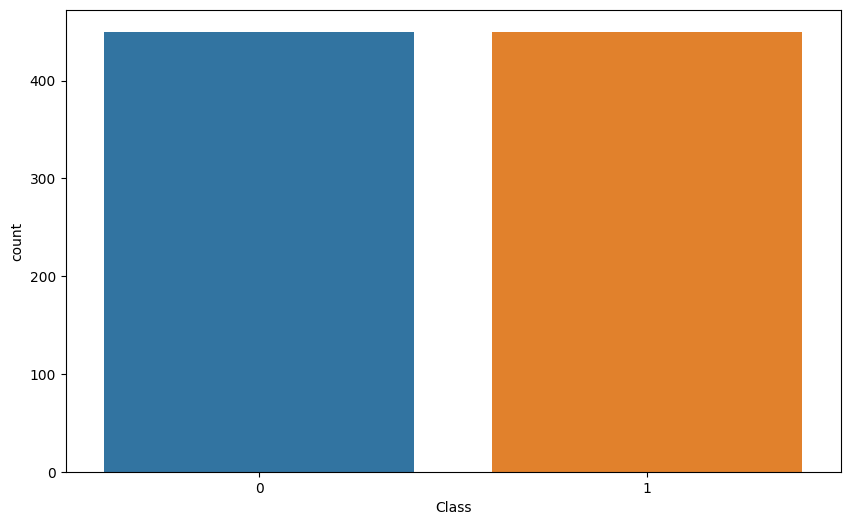

In [22]:
sns.countplot(df.Class);

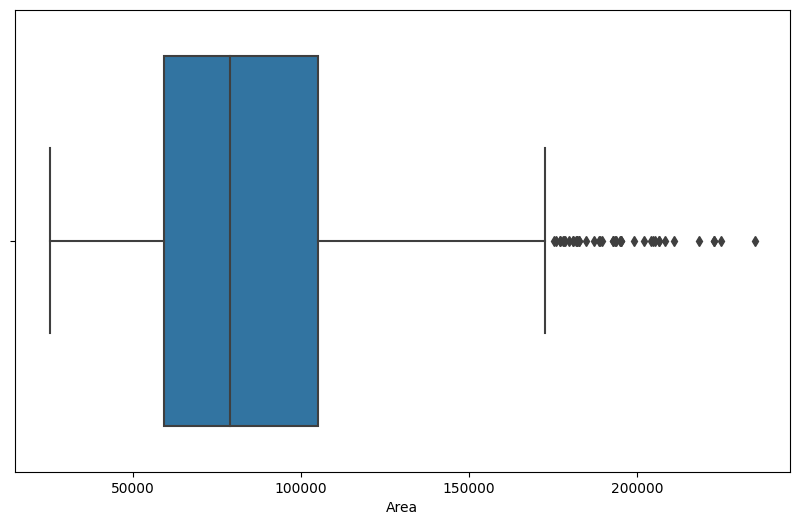

In [23]:
sns.boxplot(df.Area);

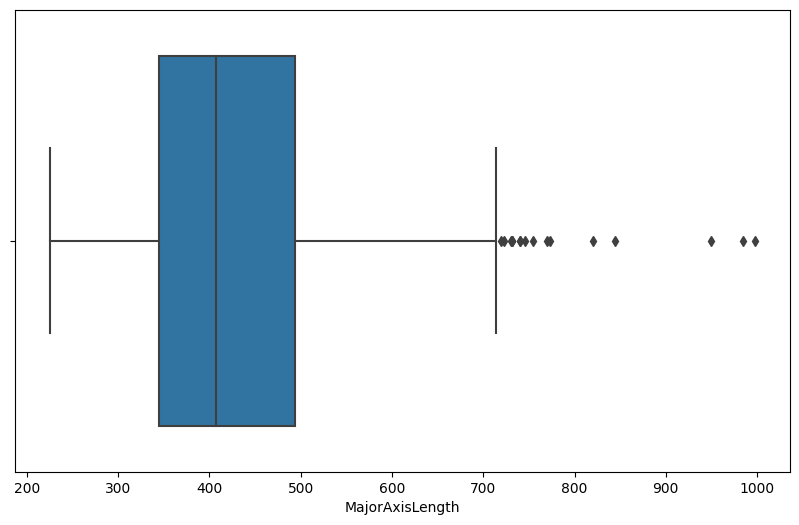

In [24]:
sns.boxplot(df.MajorAxisLength);

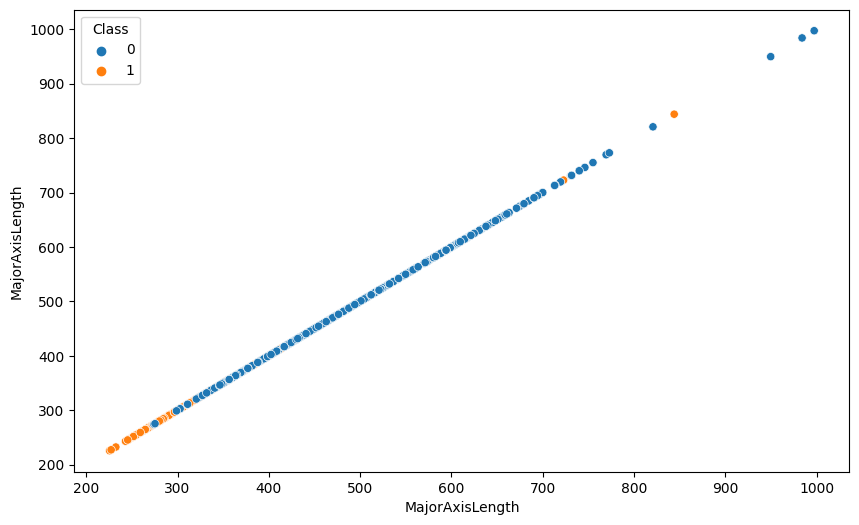

In [25]:
sns.scatterplot(x=df.MajorAxisLength, y=df.MajorAxisLength, data=df, hue="Class");

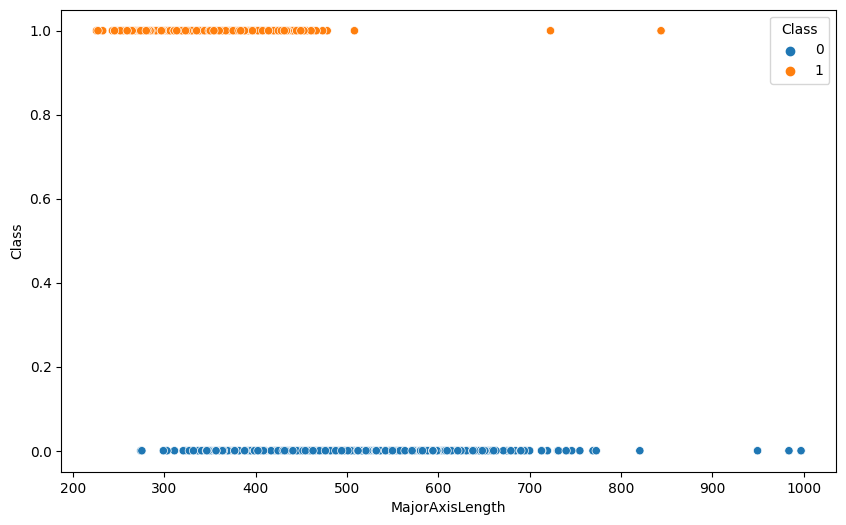

In [26]:
sns.scatterplot(x=df['MajorAxisLength'], y=df['Class'], hue=df['Class']);

It seems there is no outlier for MajorAxisLength

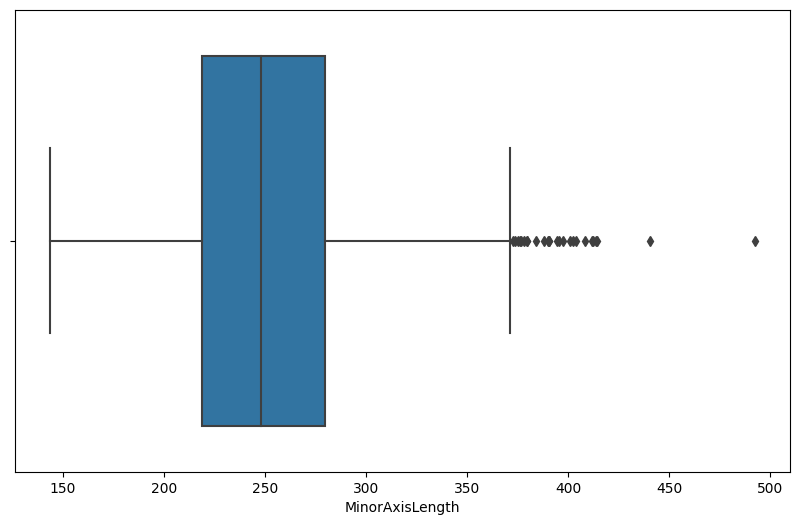

In [27]:
sns.boxplot(df.MinorAxisLength);

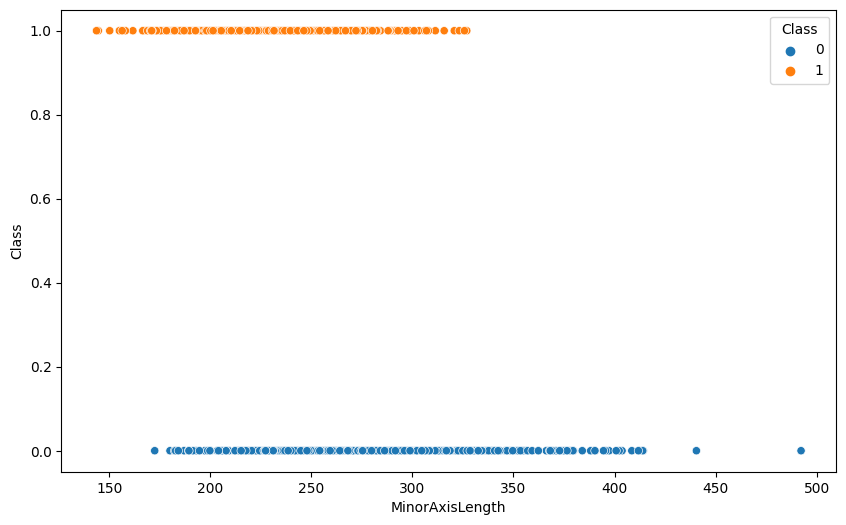

In [28]:
sns.scatterplot(x=df['MinorAxisLength'], y=df['Class'], hue=df['Class']);

It seems there is no outlier for MinorAxisLength

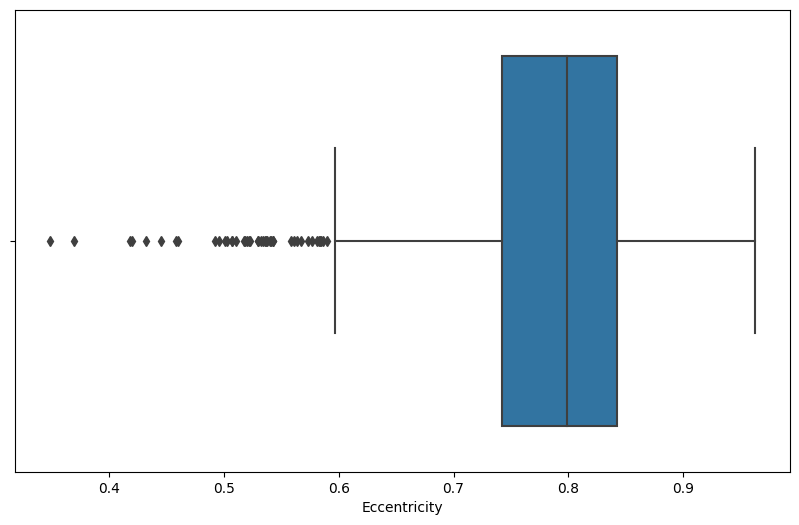

In [29]:
sns.boxplot(df.Eccentricity);

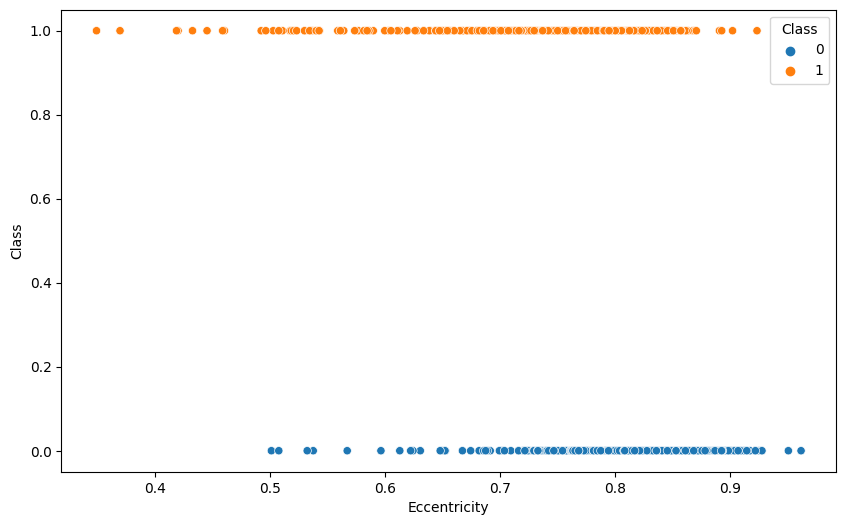

In [30]:
sns.scatterplot(x=df['Eccentricity'], y=df['Class'], hue=df['Class']);

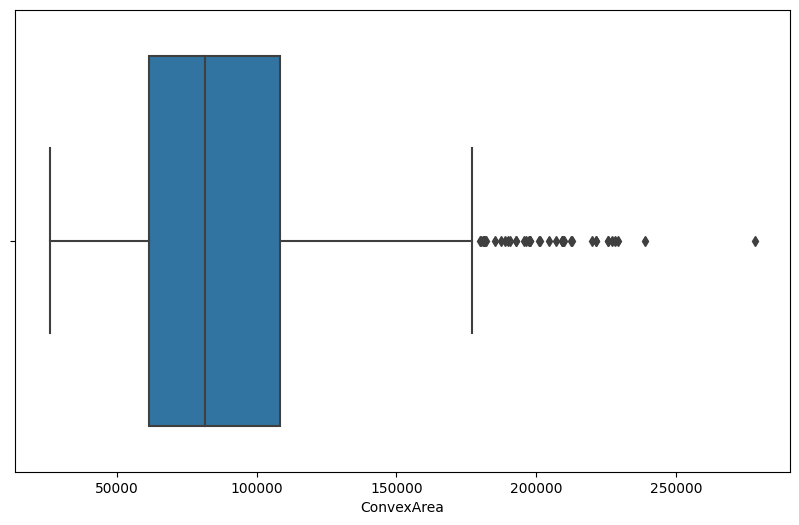

In [31]:
sns.boxplot(df.ConvexArea);

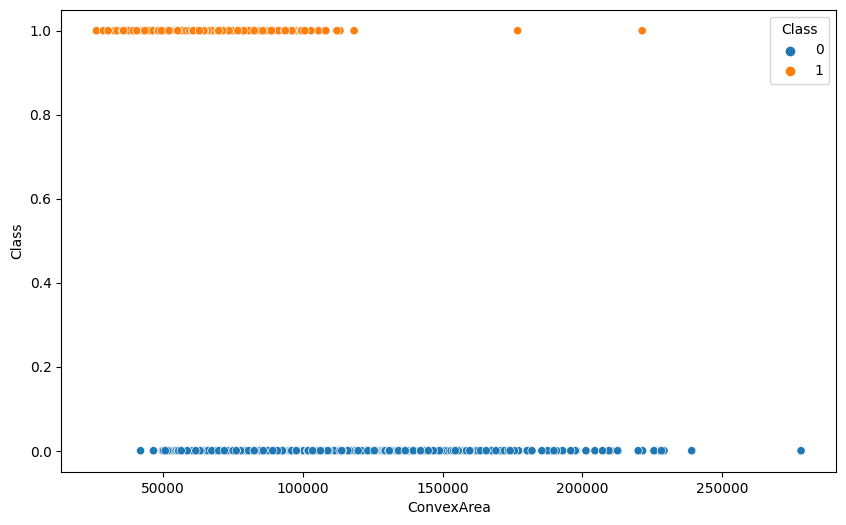

In [32]:
sns.scatterplot(x=df['ConvexArea'], y=df['Class'], hue=df['Class']);

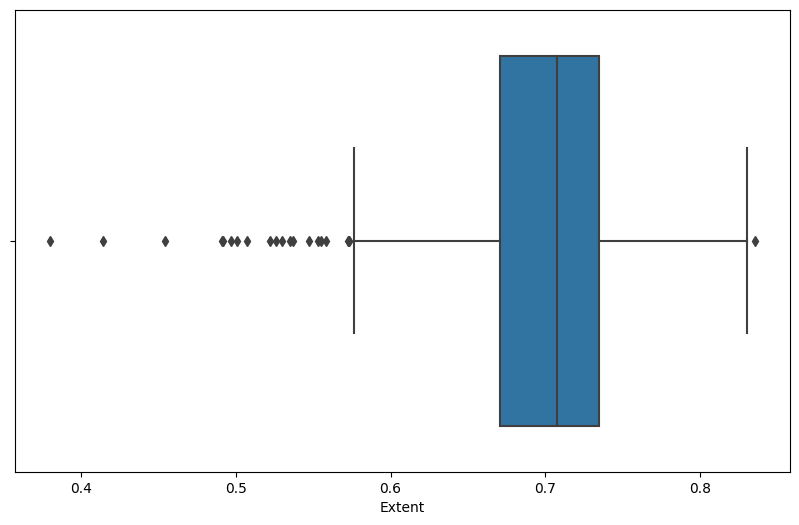

In [33]:
sns.boxplot(df.Extent);

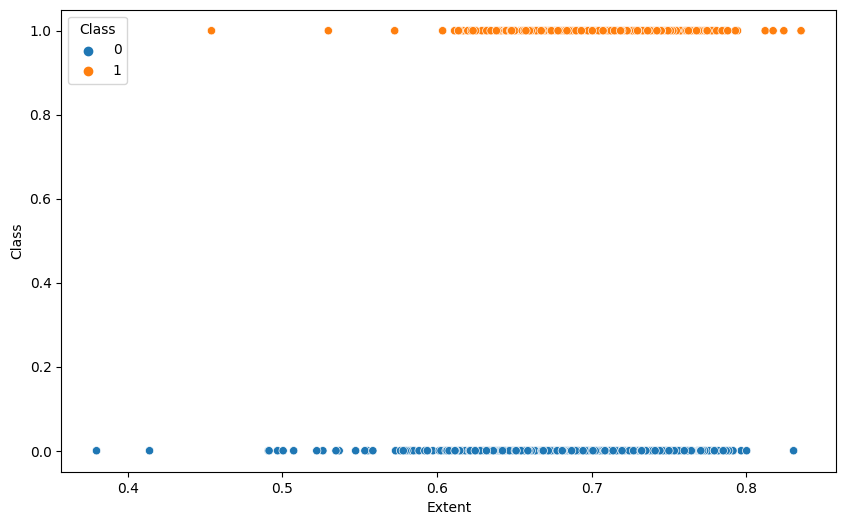

In [34]:
sns.scatterplot(x=df['Extent'], y=df['Class'], hue=df['Class']);

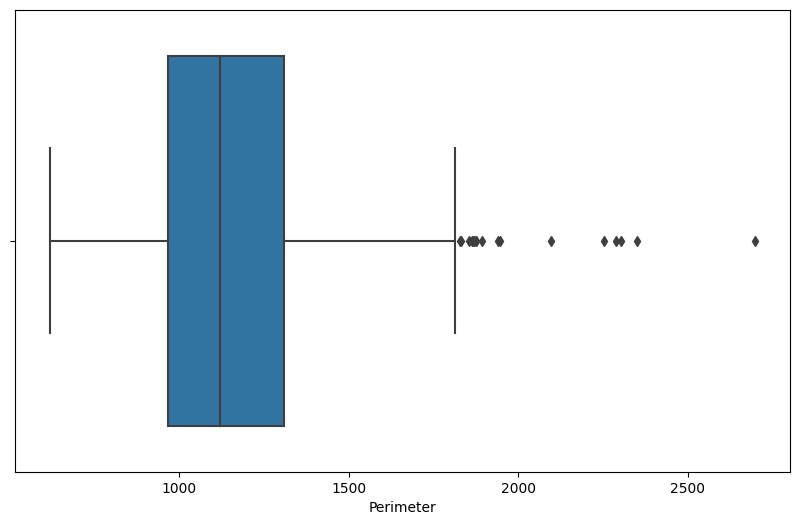

In [35]:
sns.boxplot(df.Perimeter);

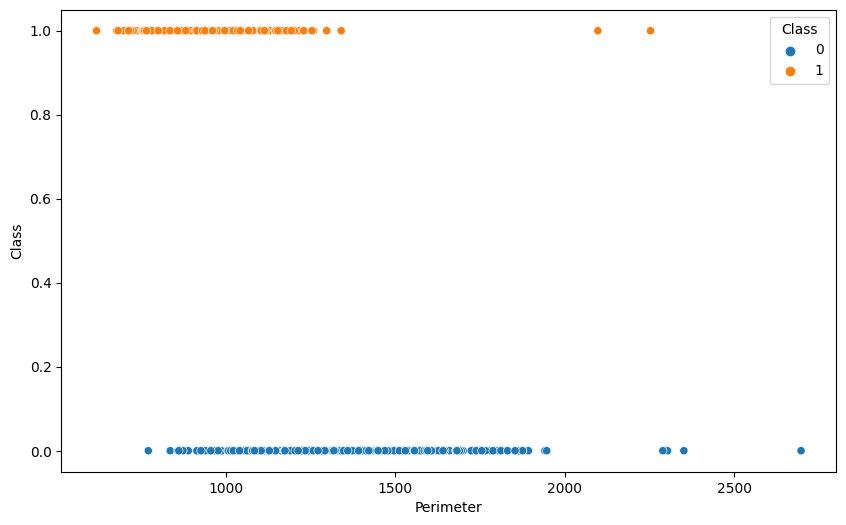

In [36]:
sns.scatterplot(x=df['Perimeter'], y=df['Class'], hue=df['Class']);

In [37]:
df = df[df.Perimeter<2000] 

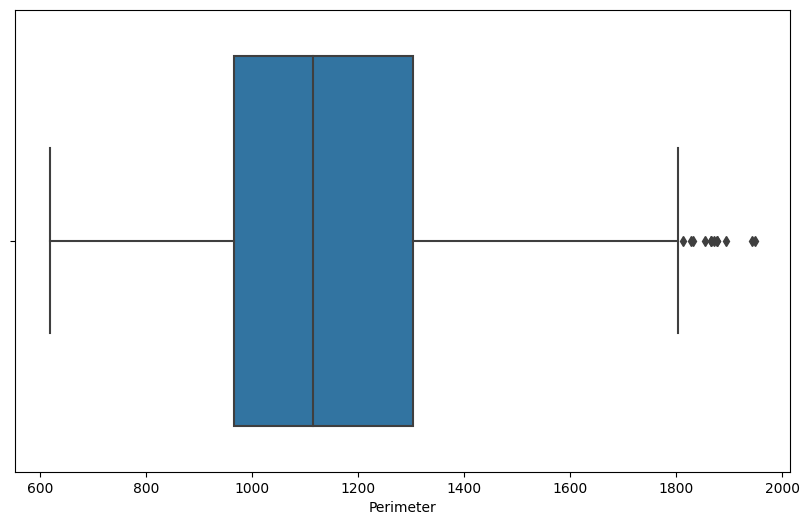

In [38]:
sns.boxplot(df.Perimeter);

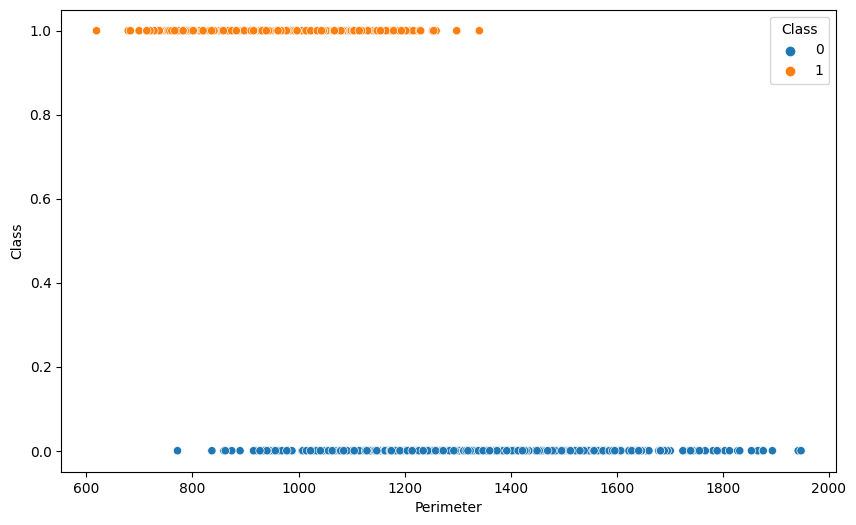

In [39]:
sns.scatterplot(x=df['Perimeter'], y=df['Class'], hue=df['Class']);

In [40]:
df.shape

(894, 8)

Values over 2000 were deleted so that the model could learn better.

In [32]:
# sns.pairplot(df, hue="Class");

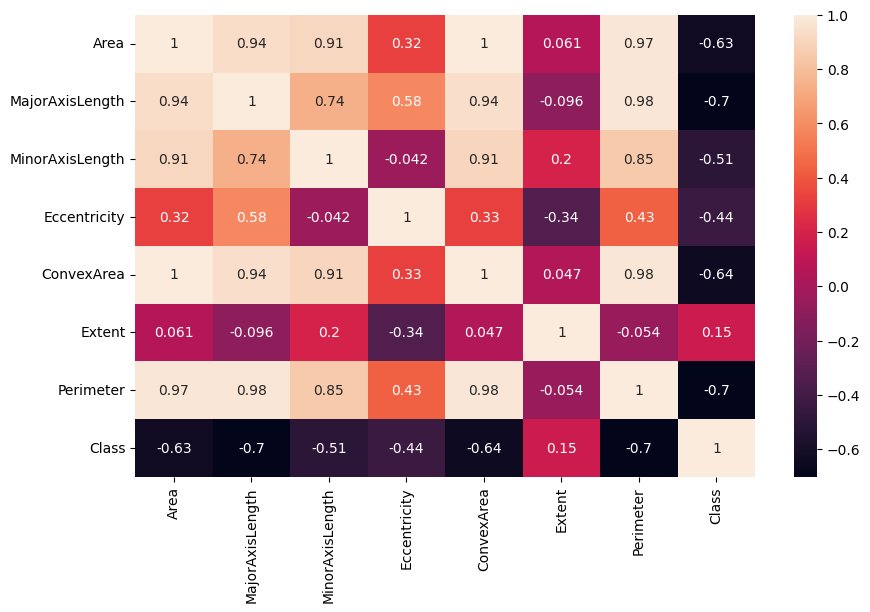

In [41]:
sns.heatmap(df.corr(), annot = True);

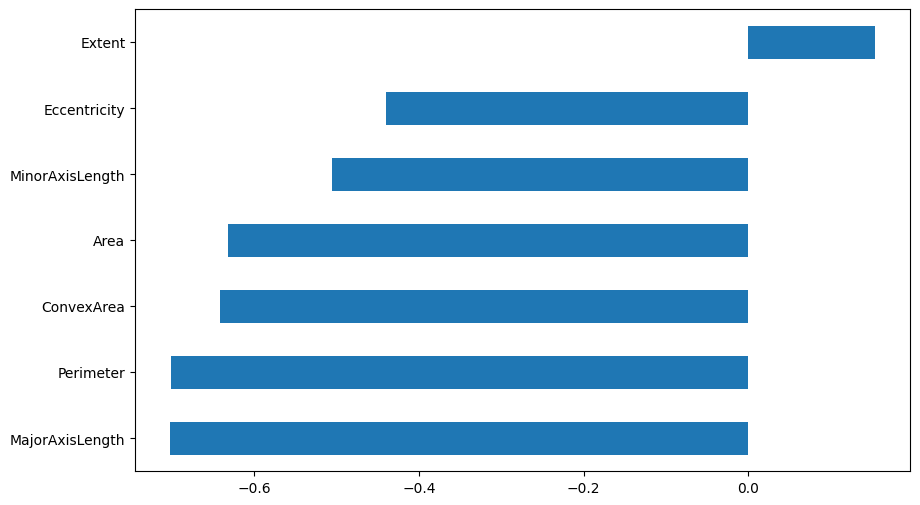

In [42]:
df.corr()["Class"].drop("Class").sort_values().plot.barh();

## Train | Test Split and Scaling

In [43]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Scaling**

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_model = LogisticRegression()

In [50]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
y_pred = log_model.predict(X_test_scaled)

In [52]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [53]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
82,58650,346.339,219.684,0.773,62380,0.660,991.612,1,1,0.813
72,69006,379.318,241.850,0.770,72895,0.697,1086.857,1,1,0.659
779,103915,516.486,260.105,0.864,106499,0.691,1285.063,0,0,0.063
344,69997,362.741,247.091,0.732,71994,0.723,1010.809,1,1,0.863
889,79058,454.437,236.964,0.853,82555,0.578,1175.034,0,0,0.171
800,137921,598.761,297.202,0.868,142159,0.749,1510.852,0,0,0.004
78,76984,425.048,233.973,0.835,78641,0.759,1091.754,1,1,0.575
669,98166,420.702,299.584,0.702,100659,0.707,1245.034,0,0,0.359
547,117077,496.131,314.547,0.773,123305,0.709,1419.160,0,0,0.043
480,137508,604.114,292.096,0.875,141818,0.602,1529.790,0,0,0.002


## Model Performance

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [48]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 90  16]
 [ 16 102]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       106
           1       0.86      0.86      0.86       118

    accuracy                           0.86       224
   macro avg       0.86      0.86      0.86       224
weighted avg       0.86      0.86      0.86       224


Train_Set
[[289  51]
 [ 35 295]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       340
           1       0.85      0.89      0.87       330

    accuracy                           0.87       670
   macro avg       0.87      0.87      0.87       670
weighted avg       0.87      0.87      0.87       670



### Cross Validate

In [49]:
from sklearn.model_selection import cross_validate

In [50]:
model = LogisticRegression()  
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.005,0.002,0.906,0.879,0.892,0.896
2,0.003,0.002,0.909,0.909,0.909,0.910
3,0.004,0.002,0.800,0.848,0.824,0.821
4,0.003,0.003,0.838,0.939,0.886,0.881
5,0.004,0.002,0.833,0.909,0.870,0.866
6,0.004,0.002,0.800,0.848,0.824,0.821
7,0.004,0.001,0.800,0.970,0.877,0.866
8,0.003,0.002,0.879,0.879,0.879,0.881
9,0.003,0.002,0.806,0.758,0.781,0.791
10,0.003,0.002,0.938,0.909,0.923,0.925


In [51]:
df_scores.mean()[2:] 

test_precision   0.851
test_recall      0.885
test_f1          0.866
test_accuracy    0.866
dtype: float64

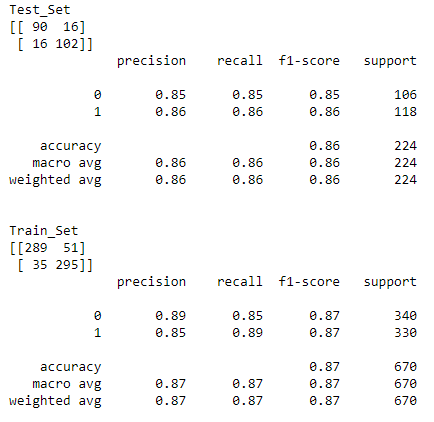

### GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik 

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliriz
                          n_jobs = -1)

In [54]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [55]:
grid_model.best_params_

{'C': 33.59818286283781,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [56]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[ 88  18]
 [ 12 106]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       106
           1       0.85      0.90      0.88       118

    accuracy                           0.87       224
   macro avg       0.87      0.86      0.87       224
weighted avg       0.87      0.87      0.87       224


Train_Set
[[291  49]
 [ 30 300]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       340
           1       0.86      0.91      0.88       330

    accuracy                           0.88       670
   macro avg       0.88      0.88      0.88       670
weighted avg       0.88      0.88      0.88       670



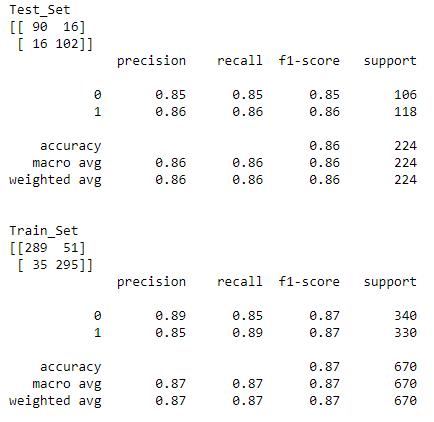

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [57]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

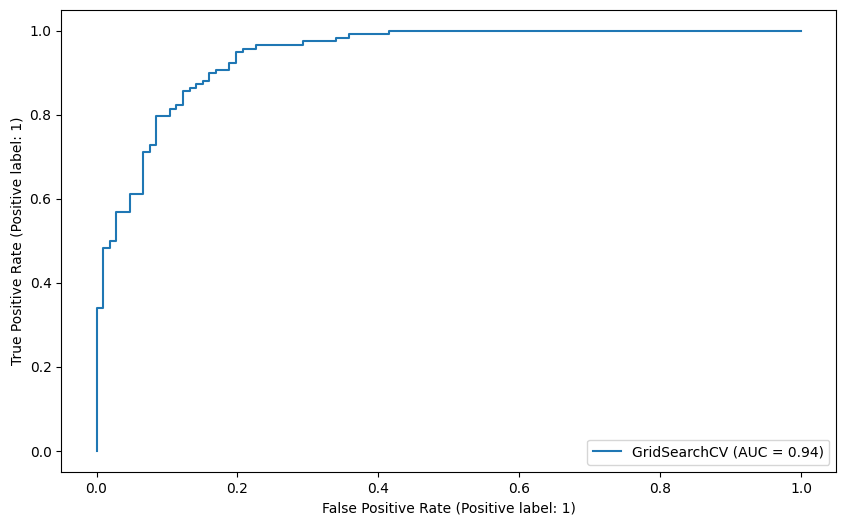

In [58]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

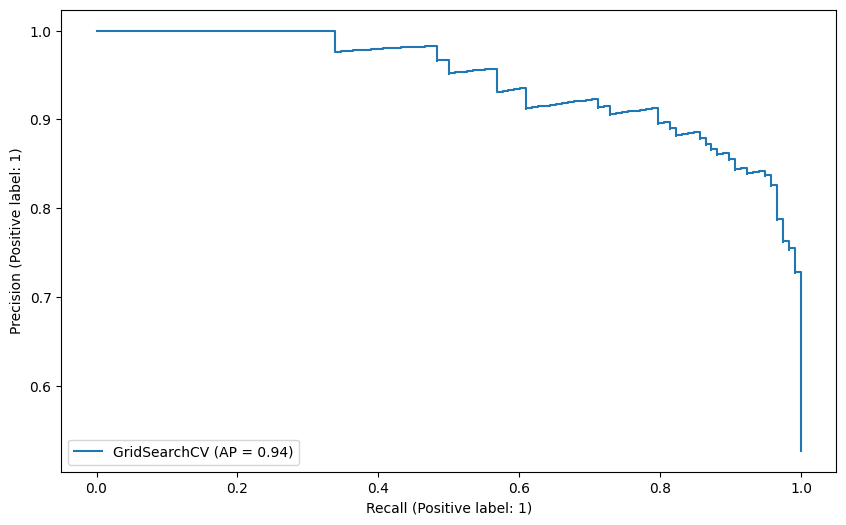

In [59]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [60]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9219093933098252

In [63]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [64]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) #buda formül aslında f1 skorun formülü
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.33628408964378415

In [65]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [66]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 84  22]
 [  5 113]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       106
           1       0.84      0.96      0.89       118

    accuracy                           0.88       224
   macro avg       0.89      0.88      0.88       224
weighted avg       0.89      0.88      0.88       224



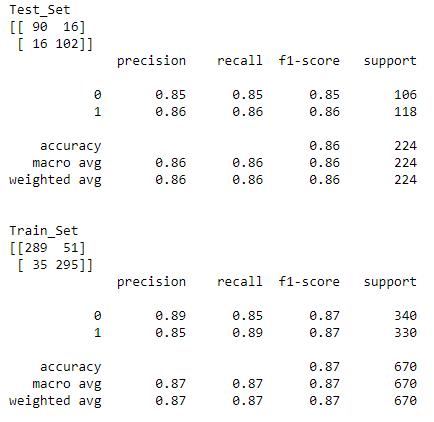

# Final Model and Model Deployment

In [79]:
scaler = StandardScaler().fit(X)

In [80]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb'))

In [81]:
X_scaled = scaler.transform(X)
final_model = LogisticRegression(C=33.60, class_weight = "balanced", penalty='l1', solver='liblinear').fit(X_scaled, y)

In [82]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))

# New Observation

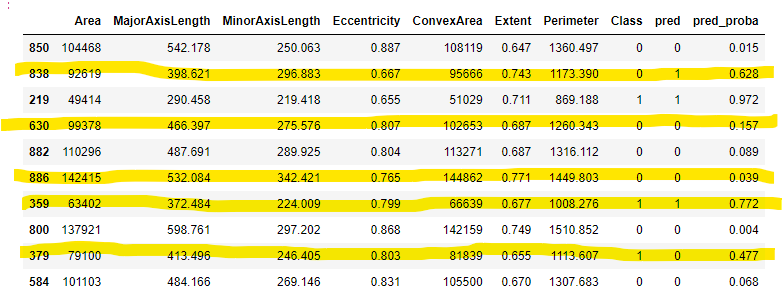

In [83]:
new_dict = {"Area": [92619, 99378, 142415, 63402, 79100],
            "MajorAxisLength": [398.621, 466.397, 532.084, 372.484, 413.496],
            "MinorAxisLength": [296.883, 275.576, 342.421, 224.009, 246.405],
           "Eccentricity": [0.667, 0.807, 0.765, 0.799, 0.803],
           "ConvexArea": [95666, 102653, 144862, 66639, 81839],
           "Extent": [0.743, 0.687, 0.771, 0.677, 0.655],
           "Perimeter": [1173.390, 1260.343, 1449.803, 1008.276, 1113.607],
            }
new_dict

{'Area': [92619, 99378, 142415, 63402, 79100],
 'MajorAxisLength': [398.621, 466.397, 532.084, 372.484, 413.496],
 'MinorAxisLength': [296.883, 275.576, 342.421, 224.009, 246.405],
 'Eccentricity': [0.667, 0.807, 0.765, 0.799, 0.803],
 'ConvexArea': [95666, 102653, 144862, 66639, 81839],
 'Extent': [0.743, 0.687, 0.771, 0.677, 0.655],
 'Perimeter': [1173.39, 1260.343, 1449.803, 1008.276, 1113.607]}

In [84]:
sample = pd.DataFrame(new_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,92619,398.621,296.883,0.667,95666,0.743,1173.390
1,99378,466.397,275.576,0.807,102653,0.687,1260.343
2,142415,532.084,342.421,0.765,144862,0.771,1449.803
3,63402,372.484,224.009,0.799,66639,0.677,1008.276
4,79100,413.496,246.405,0.803,81839,0.655,1113.607


In [86]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb"))

In [87]:
sample_scaled = scaler_raisin.transform(sample)
sample_scaled

array([[ 0.14115226, -0.26623494,  0.86067045, -1.26533872,  0.13656696,
         0.84152743,  0.05962879],
       [ 0.31730601,  0.35062434,  0.43254268,  0.29465533,  0.31423273,
        -0.28293103,  0.39822243],
       [ 1.4389407 ,  0.9484707 ,  1.77567877, -0.17334289,  1.38752517,
         1.40375666,  1.13597674],
       [-0.62030418, -0.5041193 , -0.60360809,  0.20551281, -0.60153297,
        -0.48372719, -0.58332257],
       [-0.2111813 , -0.130851  , -0.15359873,  0.25008407, -0.21502665,
        -0.92547872, -0.17316529]])

In [88]:
final_model = pickle.load(open("final_model_raisin", "rb"))

In [89]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [92]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.33"] = predictions2
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred_proba,pred_0.50,pred_0.33
0,92619,398.621,296.883,0.667,95666,0.743,1173.390,0.557,1,1
1,99378,466.397,275.576,0.807,102653,0.687,1260.343,0.141,0,0
2,142415,532.084,342.421,0.765,144862,0.771,1449.803,0.015,0,0
3,63402,372.484,224.009,0.799,66639,0.677,1008.276,0.778,1,1
4,79100,413.496,246.405,0.803,81839,0.655,1113.607,0.587,1,1


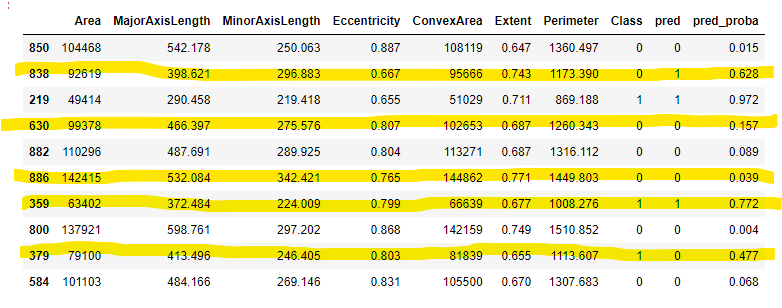

# Conclusion 